# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Цель проекта**

Нам нужно проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов.\
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


**Входные данные**

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


**Описание данных**

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)\
balcony — число балконов\
ceiling_height — высота потолков (м)\
cityCenters_nearest — расстояние до центра города (м)\
days_exposition — сколько дней было размещено объявление (от публикации до снятия)\
first_day_exposition — дата публикации\
floor — этаж\
floors_total — всего этажей в доме\
is_apartment — апартаменты (булев тип)\
kitchen_area — площадь кухни в квадратных метрах (м²)\
last_price — цена на момент снятия с публикации\
living_area — жилая площадь в квадратных метрах (м²)\
locality_name — название населённого пункта\
open_plan — свободная планировка (булев тип)\
parks_around3000 — число парков в радиусе 3 км\
parks_nearest — расстояние до ближайшего парка (м)\
ponds_around3000 — число водоёмов в радиусе 3 км\
ponds_nearest — расстояние до ближайшего водоёма (м)\
rooms — число комнат\
studio — квартира-студия (булев тип)\
total_area — общая площадь квартиры в квадратных метрах (м²)\
total_images — число фотографий квартиры в объявлении\



**Ход исследования**

Исследование пройдёт в несколько этапов:\
. обзор данных;\
. предобработка данных;\
. исследовательский анализ данных;\
. выводы.

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import display
import warnings
warnings.simplefilter("ignore")

## 1. Изучим общую информацию

In [2]:
# считаем данные из csv-файла в датафрейм и сохраним в переменную 
data = pd.read_csv('C:/Users/nata/Downloads/real_estate_data.csv', sep='\t')

In [3]:
# выведим датафрейм
pd.set_option('display.max_columns', None)
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
# выведим общую информацию методом .info()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

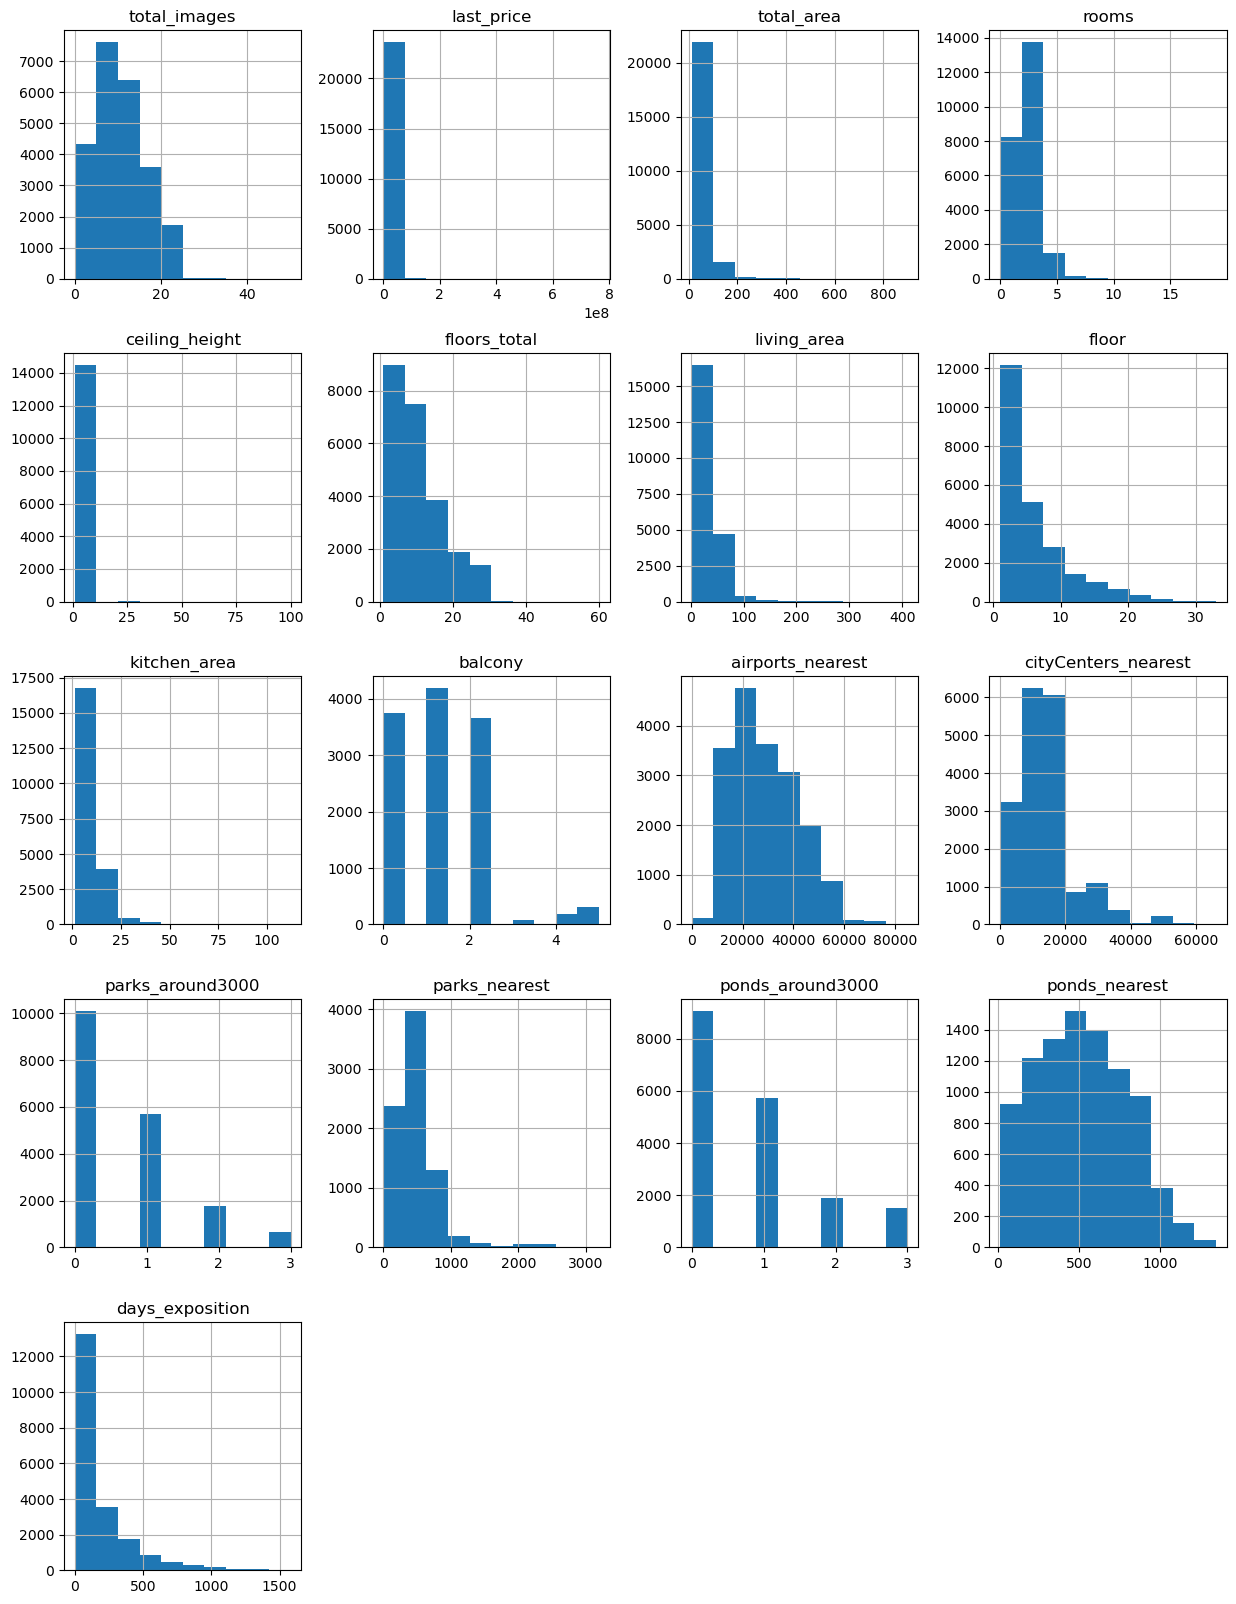

In [5]:
# построим гистограммы для все числовых столбцов методом .hist()
data.hist(figsize=(15, 20));

**Промежуточные итоги**:\
После изучения общей информации данных (архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет) выяснили:\
. данные представлены по 23 699 квартирам;\
. каждая квартира описана двадцати двумя параметрами. Помним, что параметры имеют два вида. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных;\
. по некоторым квартирам не все данные заполнены (т.е. есть пропущенные значения в некоторых столбцах);\
. у части данных некорретный тип данных;\
. присутствуют альтернативные написания одного и того же (речь о названии населённых пунктов).

## 2. Предобработка данных

### 2.1. Пропущенные значения в столбцах

In [6]:
# заполним нулевые значения в столбце 'is_apartment' на False так, как как это булев тип данных
# руководствуемся тем, что на рынке недвижимости в России этот вид недвижимости сравнительно недавно
data['is_apartment'] = data['is_apartment'].fillna(False)

# заменим пропуски в столбце 'balcony' на 0
# скорее всего пропуски возникли по причине того, что в квартире балконов просто нет
data['balcony'] = data['balcony'].fillna(0)

**Промежуточные итоги:** \
Мы заполнили пропуски там, где это возможно и логично, а где нет - оставили пропуски.\
Возможными причинами появления пропусков в исходных данных могут быть:\
. неслучайные (человек умышлено скрыл информацию);\
. случайные (человек не внимательно вносил/переносил данные);\
. полностью случайные (системные ошибки, сам процесс выгрузки «испортил» данные).\

Пропущенные значения — это тоже важный сигнал, который нужно учитывать.

Итак, пропуски есть в следующих столбцах:\
. 'ceiling_height' - оставили без изменений (высота потолков (м));\
. 'floors_total' -  оставили без изменений (всего этажей в доме);\
. 'living_area' - оставили без изменений (жилая площадь в квадратных метрах (м²));\
. 'is_apartment' - внесли изменения (апартаменты (булев тип));\
. 'kitchen_area' - оставили без изменений (площадь кухни в квадратных метрах (м²));\
. 'balcony' - внесли изменения  (число балконов);\
. 'locality_name' - оставили без изменений (название населённого пункта);\
. 'airports_nearest' - оставили без изменений (расстояние до ближайшего аэропорта в метрах (м));\
. 'cityCenters_nearest' - оставили без изменений (расстояние до центра города (м));\
. 'parks_around3000' - оставили без изменений (число парков в радиусе 3 км);\
. 'parks_nearest' -оставили без изменений (расстояние до ближайшего парка (м));\
. 'ponds_around3000' - оставили без изменений (число водоёмов в радиусе 3 км);\
. 'ponds_nearest' - оставили без изменений (расстояние до ближайшего водоёма (м));\
. 'days_exposition' - оставили без изменений, раз пропуски есть значит эти квартиры не проданы(сколько дней было размещено объявление (от публикации до снятия)) 

### 2.2. Изменение типов данных

In [7]:
# преобразуем типы данных методом .astype()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype('int')

**Промежуточные итоги:** \
Мы определили ранее, что часть столбцов имеет некорректный тип данных.\
Преобразовали часть из них, т.е. заменили вещественный тип данных в столбцах на целочисленный, строковой тип данных одного столбца на более удобный тип для даты. 

В этих столбцах:\
. 'first_day_exposition' - изменили тип данных с object на datetime (дата публикации);\
. 'floors_total' - можно изменить тип данных с float на int, но есть пропуски поэтому оставили все как есть (всего этажей в доме);\
. 'balcony' - изменили тип данных с float на int (число балконов);\
. 'parks_around3000' - можно изменить тип данных с float на int, но есть пропуски поэтому оставили все как есть (число парков в радиусе 3 км);\
. 'ponds_around3000' - можно изменить тип данных с float на int, но есть пропуски поэтому оставили все как есть (число водоёмов в радиусе 3 км);\
. 'days_exposition' - можно изменить тип данных с float на int, но есть пропуски поэтому оставили все как есть (сколько дней было размещено объявление).\

Почему мы внесли изменения? Логичнее и удобнее работать с правильными типами.    

### 2.3. Устранение неявнях дубликатов

In [8]:
# ищем неявные дубликаты методом .unique()
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [9]:
# исправим альтернативные написания значений в столбце 'locality_name' методом .replace()
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа Рябово', 'посёлок Тельмана'], 'поселок Тельмана', regex=True)
    .replace(['поселок городского типа Рябово'], 'поселок Рябово', regex=True)
)

**Промежуточные итоги:** \
Изучили уникальные значения в столбце 'locality_name' и устраним неявные дубликаты, заменив название части населенных пунктов на одинаковые в существующем столбце для удобства работы с ними.

## 3. Посчитаем и добавим в таблицу новые столбцы

### 3.1. Цена одного квадратного метра

In [10]:
# добавляем новый столбец 'price_square_meter' в датафрейм `data` (округлим каждое значение столбца до двух знаков после запятой)
# значение этого столбца - это результат деления стоимости объекта на его общую площадь 
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)

### 3.2. День недели публикации каждого объявления (0 — понедельник, 1 — вторник и так далее)

In [11]:
# добавляем новый столбец 'weekday_exposition' в датафрейм `data`
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

### 3.3. Месяц публикации объявления

In [12]:
# добавляем новый столбец 'month_exposition' в датафрейм `data`
data['month_exposition'] = data['first_day_exposition'].dt.month

### 3.4. Год публикации объявления

In [13]:
# добавляем новый столбец 'year_exposition' в датафрейм `data`
data['year_exposition'] = data['first_day_exposition'].dt.year

### 3.5. Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [14]:
# запишем правила классификации этажей, как функции 
# на вход функции попадает номер этажа, а возвращает она его категорию 
# опишем функцию: 
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [15]:
# добавляем новый столбец 'floor_group' в датафрейм `data`, 
# где хранятся результаты применения функции floor_group() ко всем строкам датафрейма
data['floor_group'] = data.apply(floor_group, axis = 1)

### 3.6. Расстояние до центра города в километрах

In [16]:
# добавляем новый столбец 'cityCenters_nearest_km в датафрейм `data`
# переводим расстояние до центра города из м в км и округляем это значение до ближайших целых значений
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()

**Промежуточные итоги:** \
В исходный датасет добавили новые столбцы, т.е. создали новые «признаки», а именно:
. цена одного квадратного метра;\
. день недели публикации каждого объявления;\
. месяц публикации объявления;\
. год публикации объявления;\
. тип этажа квартиры (значения — «первый», «последний», «другой»).

## 4. Провем исследовательский анализ данных

### 4.1. Изучим перечислнные ниже ниже параметры объектов и построем отдельные гистограммы для каждого из этих параметров

Параметры для изучения:\
o	общая площадь;\
o	жилая площадь;\
o	площадь кухни;\
o	цена объекта;\
o	количество комнат;\
o	высота потолков;\
o	тип этажа квартиры («первый», «последний», «другой»);\
o	общее количество этажей в доме;\
o	расстояние до центра города в метрах;\
o	расстояние до ближайшего парка.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

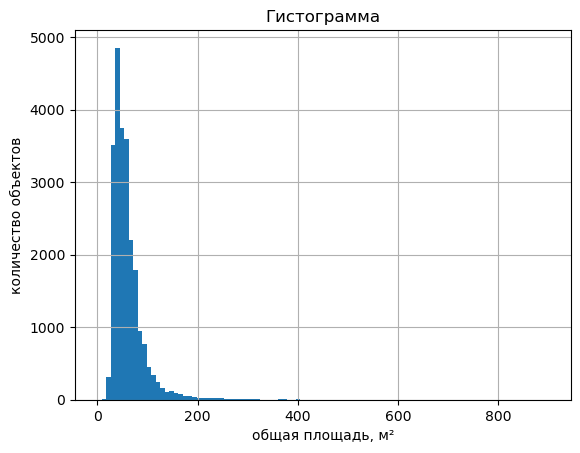

In [17]:
# общая площадь:
# на гистограмме мощный узий пик в районе 60м², очень мало значений до 30м² и после 150м²
data['total_area'].hist(bins=100, range = (0, 900))
plt.title("Гистограмма")
plt.xlabel("общая площадь, м²")
plt.ylabel("количество объектов")
data['total_area'].describe()

In [18]:
# проверим как много строк потеряется, 
# если просто отбросить подозрительные квартиры с очень маленькими и очень большими площадями
print(len(data.query('total_area < 30 or total_area > 150'))/len(data))

0.053040212667201145


In [19]:
# сделаем срез данных, отбросив подозрительные площади и далее будем работать с ним
new_data = data.query('30 <= total_area <= 150')

count    22442.000000
mean        57.489420
std         22.664837
min         30.000000
25%         41.000000
50%         52.000000
75%         68.300000
max        150.000000
Name: total_area, dtype: float64

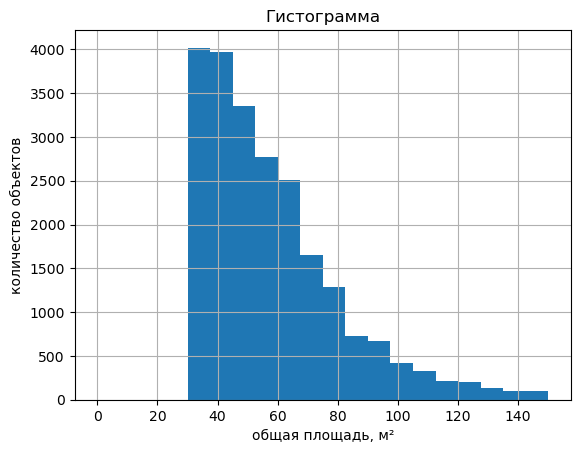

In [20]:
# гистограмма среза данных имеет нормальное распределение (больших скачков не наблюдается)
new_data['total_area'].hist(bins=20, range = (0, 150))
plt.title("Гистограмма")
plt.xlabel("общая площадь, м²")
plt.ylabel("количество объектов")
new_data['total_area'].describe()

count    20684.000000
mean        32.810697
std         15.398427
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        128.000000
Name: living_area, dtype: float64

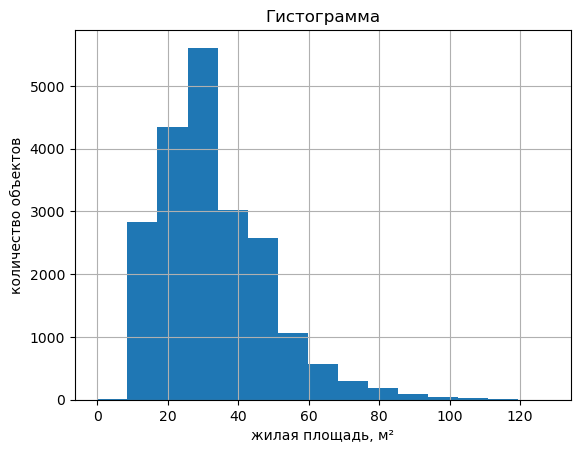

In [21]:
# жилая площадь:
# на гистограмме узий пик в районе 30м², очень мало значений после 100м²
new_data['living_area'].hist(bins=15, range = (0, 128))
plt.title("Гистограмма")
plt.xlabel("жилая площадь, м²")
plt.ylabel("количество объектов")                                             
new_data['living_area'].describe()

count    20603.000000
mean        10.272331
std          4.982612
min          2.000000
25%          7.000000
50%          9.000000
75%         11.800000
max         93.000000
Name: kitchen_area, dtype: float64

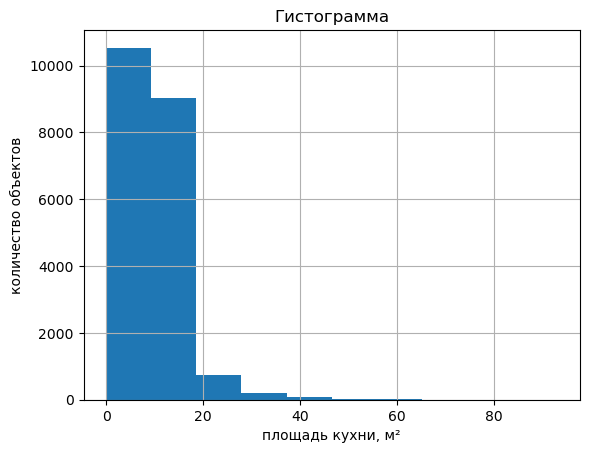

In [22]:
# площадь кухни:
# на гистограмме пик в районе 12м², очень мало значений после 40²
new_data['kitchen_area'].hist(bins=10, range = (0, 93))
plt.title("Гистограмма")
plt.xlabel("площадь кухни, м²")
plt.ylabel("количество объектов")
new_data['kitchen_area'].describe()

count    2.244200e+04
mean     5.789339e+06
std      4.562827e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.650000e+06
75%      6.650000e+06
max      1.240000e+08
Name: last_price, dtype: float64

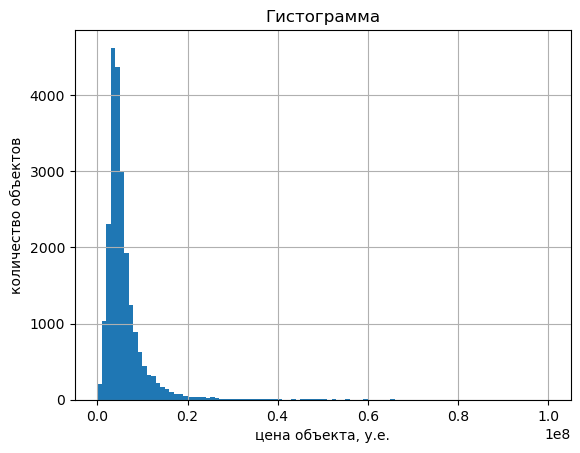

In [23]:
# цена объекта:
# на гистограмме пик в районе 5 млн., очень мало значений после 20млн, аномально низкая цена 12,19тыс.
new_data['last_price'].hist(bins=100, range = (0, 100000000))
plt.title("Гистограмма")
plt.xlabel("цена объекта, у.е.")
plt.ylabel("количество объектов")
new_data['last_price'].describe()

In [24]:
# проверим как много строк потеряется, 
# если просто отбросить подозрительные квартиры с очень маленькими и очень большими ценами
print(len(new_data.query('last_price < 1000000 or last_price > 20000000'))/len(new_data))

0.023972907940468764


In [25]:
# сделаем срез данных, отбросив подозрительные цены на квартиры и далее будем работать с ним
new_new_data = new_data.query('1000000 <= last_price <= 20000000')

count    2.190400e+04
mean     5.465111e+06
std      3.074249e+06
min      1.000000e+06
25%      3.500000e+06
50%      4.650000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64

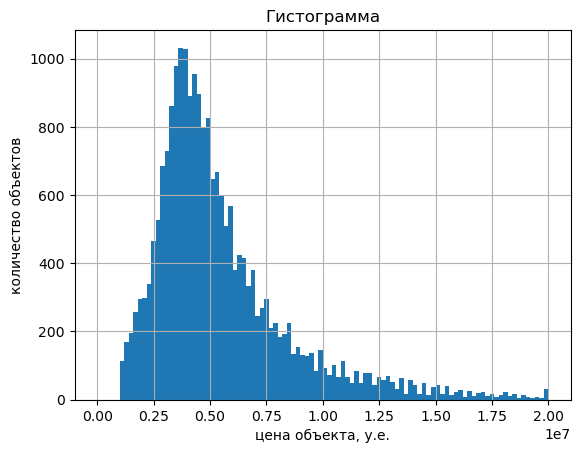

In [26]:
# гистограмма среза данных имеет нормальное распределение (больших скачков не наблюдается)
new_new_data['last_price'].hist(bins=100, range = (0, 20000000))
plt.title("Гистограмма")
plt.xlabel("цена объекта, у.е.")
plt.ylabel("количество объектов")
new_new_data['last_price'].describe()

count    21904.000000
mean         2.026342
std          0.931028
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

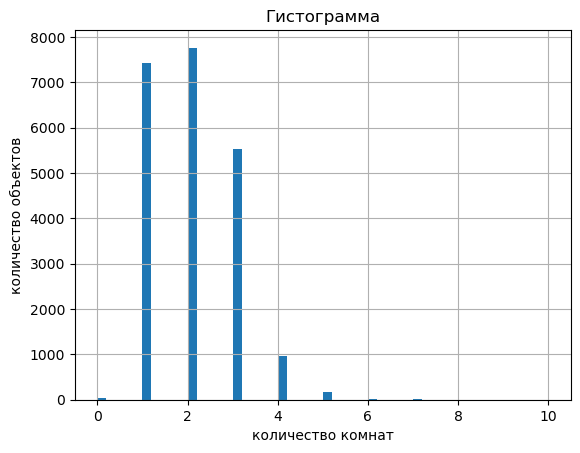

In [27]:
# количество комнат:
# на гистограмме два пика на однокомнатных и двухкомнатных квартитрах, гораздо меньше квартир с 6 и более комнат, 
# и есть квартиры без комнат
new_new_data['rooms'].hist(bins=50, range = (0, 10))
plt.title("Гистограмма")
plt.xlabel("количество комнат")
plt.ylabel("количество объектов")
new_new_data['rooms'].describe()

In [28]:
# проверим как много строк потеряется, 
# если просто отбросить подозрительные квартиры с 0 и 5 комнатами
print(len(new_new_data.query('rooms < 1 or rooms > 5'))/len(new_new_data))

0.0029218407596785976


In [29]:
# сделаем срез данных, отбросив подозрительные квартиры и далее будем работать с ним
new_new_new_data = new_new_data.query('1 <= rooms <= 5')

count    21840.000000
mean         2.023993
std          0.915882
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

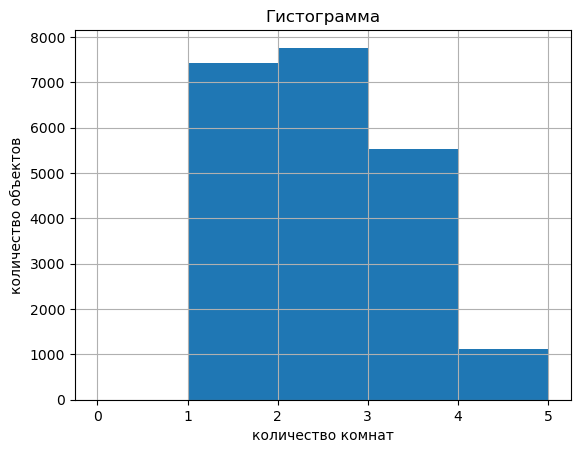

In [30]:
# гистограмма среза данных имеет нормальное распределение (больших скачков не наблюдается)
new_new_new_data['rooms'].hist(bins=5, range = (0, 5))
plt.title("Гистограмма")
plt.xlabel("количество комнат")
plt.ylabel("количество объектов")
new_new_new_data['rooms'].describe()

In [31]:
# высота потолков:
# есть  выбивающиеся значения (высота потолков 25 м и 32 м.)
# логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. исправим это
new_new_new_data.loc[new_new_new_data['ceiling_height']>20, 'ceiling_height'] = new_new_new_data.loc[new_new_new_data['ceiling_height']>20, 'ceiling_height']/10

count    13441.000000
mean         2.710869
std          0.328013
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

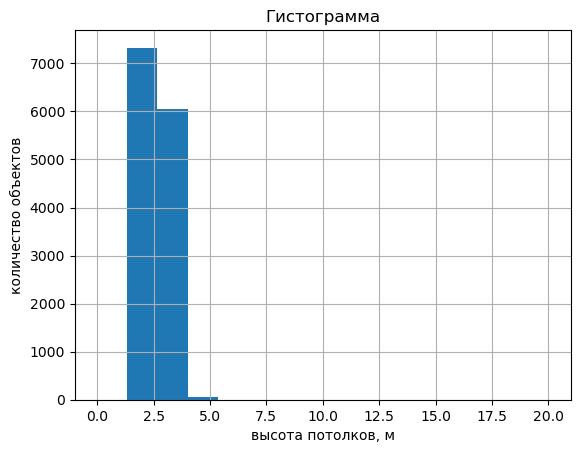

In [32]:
# на гистограмме пик соответствует высоте потолков 2,6м, гораздо меньше кварир с потолками выше 4м.
new_new_new_data['ceiling_height'].hist(bins=15, range = (0, 20))
plt.title("Гистограмма")
plt.xlabel("высота потолков, м")
plt.ylabel("количество объектов")
new_new_new_data['ceiling_height'].describe()

count      21840
unique         3
top       другой
freq       16163
Name: floor_group, dtype: object

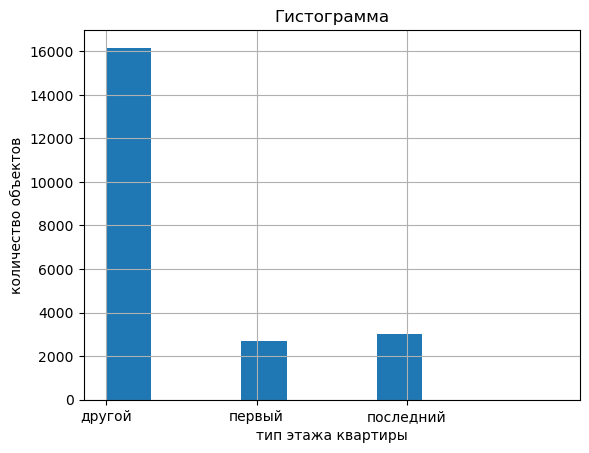

In [33]:
# тип этажа квартиры («первый», «последний», «другой»):
# на гистограмме пик на квартирах, расположенных выше первого и ниже последнего этажа (их количесво в районе 16 тыс.), 
# намного меньше квартир на первом - в районе 2,5 тыс., но чуть больше на последнем - в районе 3,0 тыс. 
new_new_new_data['floor_group'].hist(bins=10, range = (0, 3))
plt.title("Гистограмма")
plt.xlabel("тип этажа квартиры")
plt.ylabel("количество объектов")
new_new_new_data['floor_group'].describe()

count    21769.000000
mean        10.760347
std          6.590522
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

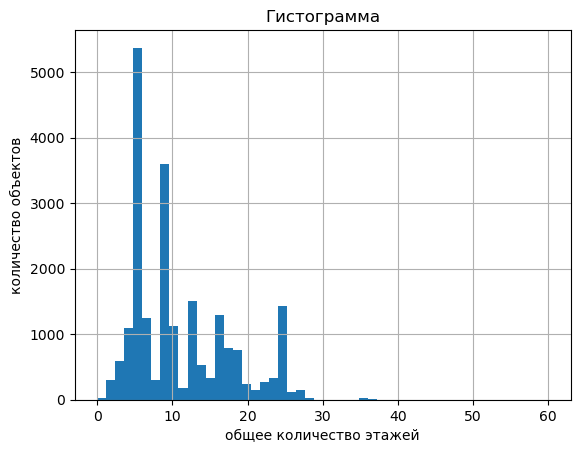

In [34]:
# общее количество этажей в доме:
# на гистограмме два выдающихся пика на квартирах в домах по 5 и 10  этажей, 
# очень мало квартир в домах с количесвом этажей более 28, 
# есть также квартиры в одноэтажных домах
new_new_new_data['floors_total'].hist(bins=50, range = (0, 60))
plt.title("Гистограмма")
plt.xlabel("общее количество этажей")
plt.ylabel("количество объектов")
new_new_new_data['floors_total'].describe()

count    16824.000000
mean        14.559082
std          8.579330
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest_km, dtype: float64

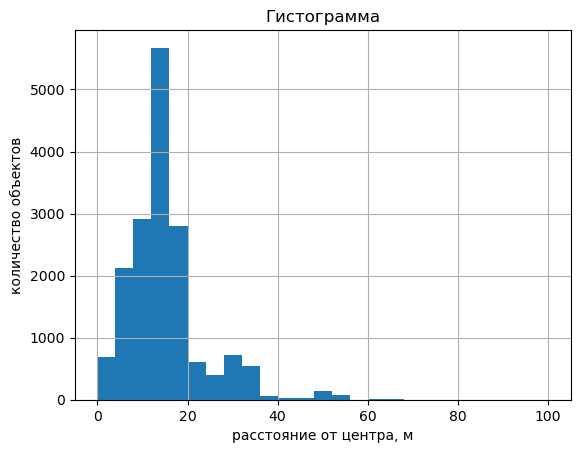

In [35]:
# расстояние до центра города в метрах:
# на гистограмме пик на квартирах, удаленных от центра города ориентировочно на 13 км.,
# меньше квартир в центре (их не более 1000шт.), гораздо меньще квартир удаленных от центра на 35 км. и более
new_new_new_data['cityCenters_nearest_km'].hist(bins=25, range = (0, 100))
plt.title("Гистограмма")
plt.xlabel("расстояние от центра, м")
plt.ylabel("количество объектов")
new_new_new_data['cityCenters_nearest_km'].describe()

count    7289.000000
mean      494.600082
std       343.515498
min         1.000000
25%       290.000000
50%       456.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

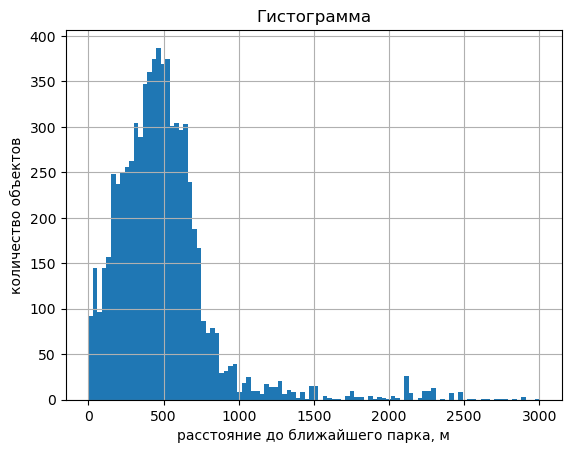

In [36]:
# расстояние до ближайшего парка:
# на гистограмме несклько пиков - это те квартиры, которые удалены от парка в районе 500 м.,
# есть квартиры, но их гораздо меньше, которые удалены более, чем на 1000 м.
new_new_new_data['parks_nearest'].hist(bins=100, range = (0, 3000))
plt.title("Гистограмма")
plt.xlabel("расстояние до ближайшего парка, м")
plt.ylabel("количество объектов")
new_new_new_data['parks_nearest'].describe()

In [37]:
# проверим какое количество данных мы отбросили
# 7.8% -  это то количество данных, которое мы в итоге отбрасили
print(1-(new_new_new_data.shape[0] / data.shape[0]))

0.07844212835984643


**Промежуточные итоги:**\
Изучив архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет можно сделать следующие выводы:\
o на рынке представлено большое количество квартир с общей площадью 60м²;\
o жилая площадь в большенстве квартир в среднем равна 30м²;\
o площадь кухни у таких квартир колеблится в районе 12м²;\
o цена объекта в среднем колеблется в районе 5,5 млн., также на рынке предтсавлены и более доргие квартиры;\
o больше всего представлено одно- и двухкомнатных квартир;\
o высота потолков в среднем в районе 2,6м;\
o больше всего представлено квартир, расположенных выше первого и ниже последнего этажа (их количесво в районе 17,5 тыс.), меньше всего квартир на первом этаже;\
o в городе больше всего невысоких зданий (это 5 и 10-ти этажные жилые дома);\
o меньше всего квартир представлено в центре города;\
o если парки и есть около дома,то как правило, они в пешей доступности.\

В данных есть аномальные значения, например, в данных об общей площади, количестве комнат, высоте потолков, а также в ценах на объекты недижимости.\
Мы обработали эти аномалии, а именно в общей площаде, количестве комнат, цене объекатов недвижимости, отбросили часть данных (это 7.8% от изначального объема данных). Также заменили часть данных по высоте потолков (природа аномалии понятна и данные действительно искажены).


### 4.2. Изучим, как быстро продавались квартиры

Text(0.5, 1.0, 'Гистограмма ящик с усами')

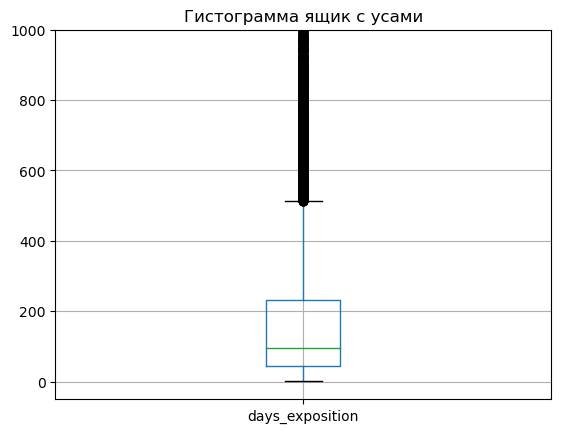

In [38]:
data.boxplot('days_exposition') 
plt.ylim(-50, 1000)
plt.title("Гистограмма ящик с усами")

Text(0, 0.5, 'количество объектов')

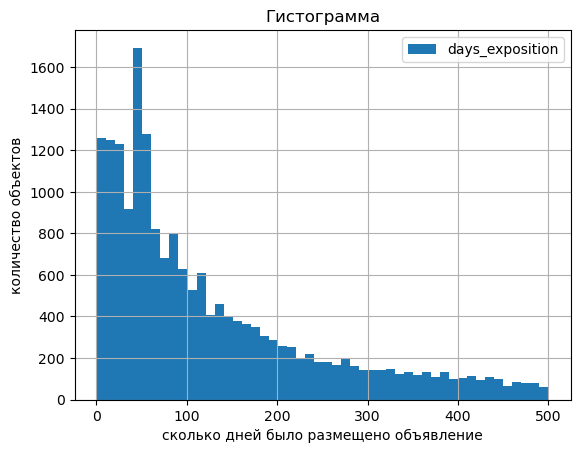

In [39]:
# построим гистограмму методом .plot()
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,500))      
plt.title("Гистограмма")
plt.xlabel("сколько дней было размещено объявление")
plt.ylabel("количество объектов")

**Промежуточные итоги:**
Возможно эти пики в районе 45/60 дней связаны со сроками публикации объявлений о продаже.
Сейчас, например, эти сроки (30/90 дней), а в 2014-2019 это были другие сроки.

In [40]:
# посмотрим описание методом .describe()
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Промежуточные итоги:**\
Мы изучили, как быстро продавались квартиры, опираясь на параметр, который показывает, сколько дней было размещено каждое объявление с помощью:\
o	построения гистограммы;\
o	подсчета среднего и медианы.

Мы можем сделать следующие выводы:\
. объявления в среднем размещаются на 180 дней, но данные не однародны(большой разброс величин), сроее всего в них могут быть серьезные аномалии и выбросы. Больше всего квартир было продано за несколько периодов - в районе 45 дней и 60 дней;\
. обычная продажа объекта недвижимости заниманиет ориентировочно от 1 до 450 дней;/
. необычно долгими можно считать продажи свыше 450 дней;\
. быстрыми продажами можно считать продажи за один день.

### 4.3. Выясним какие факторы больше всего влияют на общую (полную) стоимость объекта

корреляция = 0.3


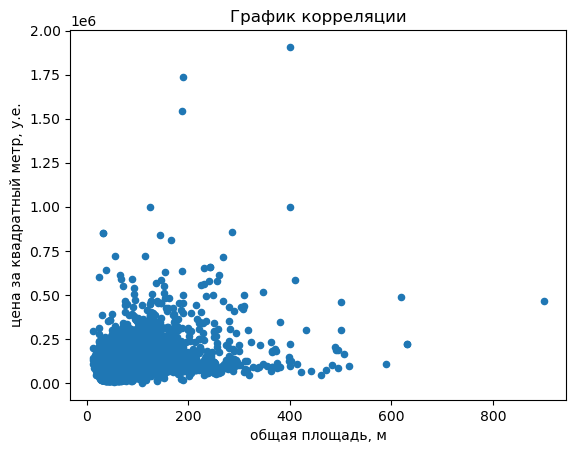

In [41]:
# зависит ли цена за квадратный метр от общей площади
data.plot(x='total_area', y='price_square_meter', kind='scatter') 
plt.title("График корреляции")
plt.xlabel("общая площадь, м")
plt.ylabel("цена за квадратный метр, у.е.")
print('корреляция =', data['total_area'].corr(data['price_square_meter']).round(2))

корреляция = 0.23


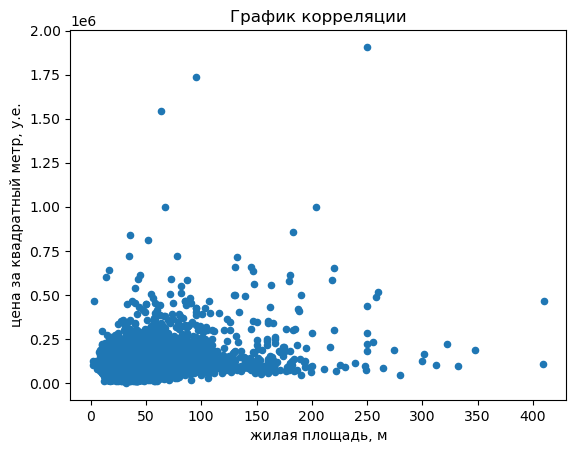

In [42]:
# зависит ли цена за квадратный метр от жилой площади
data.plot(x='living_area', y='price_square_meter', kind='scatter') 
plt.title("График корреляции")
plt.xlabel("жилая площадь, м")
plt.ylabel("цена за квадратный метр, у.е.")
print('корреляция =', data['living_area'].corr(data['price_square_meter']).round(2))

корреляция = 0.4


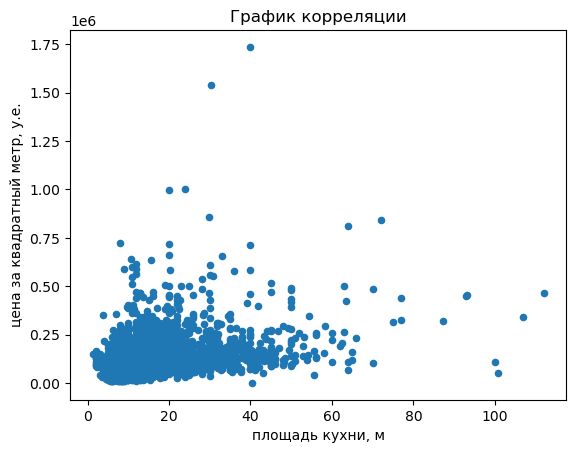

In [43]:
# зависит ли цена за квадратный метр от площади кухни
data.plot(x='kitchen_area', y='price_square_meter', kind='scatter') 
plt.title("График корреляции")
plt.xlabel("площадь кухни, м")
plt.ylabel("цена за квадратный метр, у.е.")
print('корреляция =', data['kitchen_area'].corr(data['price_square_meter']).round(2))

корреляция = 0.06


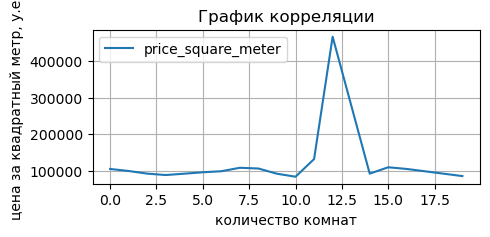

In [44]:
# зависит ли цена за квадратный метр от  количества комнат
rooms_price_square_meter = (
    data
    .pivot_table(index ='rooms', values='price_square_meter', aggfunc='median')
    .round()
) 
rooms_price_square_meter.plot(grid=True, figsize=(5, 2)) 
plt.title("График корреляции")
plt.xlabel("количество комнат")
plt.ylabel("цена за квадратный метр, у.е.")

print('корреляция =', data['rooms'].corr(data['price_square_meter']).round(2))

Text(0, 0.5, 'цена за квадратный метр, у.е.')

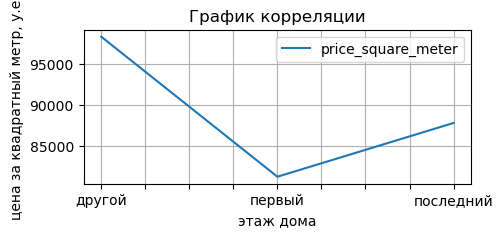

In [45]:
# зависит ли цена за квадратный метр от этажа, на котором расположена квартира (первый, последний, другой)
floor_group_price_square_meter = (
    data
    .pivot_table(index ='floor_group', values='price_square_meter', aggfunc='median')
    .round()
) 
floor_group_price_square_meter.plot(grid=True, figsize=(5, 2)) 
plt.title("График корреляции")
plt.xlabel("этаж дома")
plt.ylabel("цена за квадратный метр, у.е.")


Text(0, 0.5, 'цена за квадратный метр, у.е.')

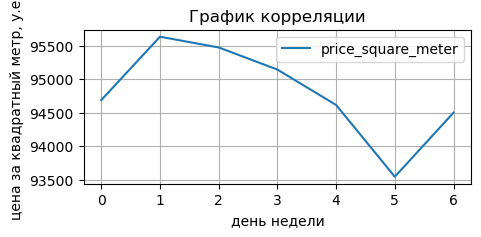

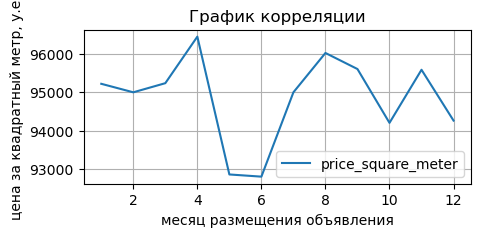

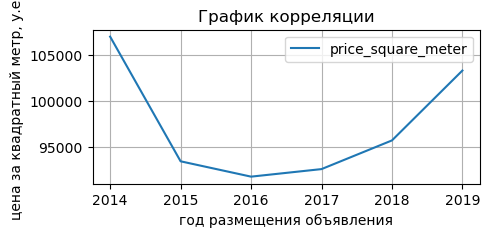

In [46]:
# зависит ли цена за квадратный метр от дня недели размещения объявления
weekday_exposition_price_square_meter = (
    data
    .pivot_table(index ='weekday_exposition', values='price_square_meter', aggfunc='median')
    .round()
) 
weekday_exposition_price_square_meter.plot(grid=True, figsize=(5, 2)) 
plt.title("График корреляции")
plt.xlabel("день недели")
plt.ylabel("цена за квадратный метр, у.е.")

# зависит ли цена за квадратный метр от месяца размещения объявления
month_exposition_price_square_meter = (
    data
    .pivot_table(index ='month_exposition', values='price_square_meter', aggfunc='median')
    .round()
) 
month_exposition_price_square_meter.plot(grid=True, figsize=(5, 2)) 
plt.title("График корреляции")
plt.xlabel("месяц размещения объявления")
plt.ylabel("цена за квадратный метр, у.е.")

# зависит ли цена за квадратный метр от года размещения объявления
year_exposition_price_square_meter = (
    data
    .pivot_table(index ='year_exposition', values='price_square_meter', aggfunc='median')
    .round()
) 
year_exposition_price_square_meter.plot(grid=True, figsize=(5, 2)) 
plt.title("График корреляции")
plt.xlabel("год размещения объявления")
plt.ylabel("цена за квадратный метр, у.е.")

**Промежуточные итоги:**\
Мы изучили некоторые факторы и выяснили, что цена за квадратный метр объекта недвижимости:\
o	не зависит от общей площади этого объекта недвижимости;\
o	не зависит от общей площади этого объекта недвижимости;\
o	не зависит от общей площади этого объекта недвижимости;\
o	не зависит от количества комнат этого объекта недвижимости;\
o	зависит от этажа, на котором расположена квартира (первый, последний, другой), т.е. чем выше расположена квартира тем дороже стоит один квадратный метр объекта недвижимости, но последний этаж будет дешевле, но не дешевле первого этажа объекта недвижимости;\
o	зависит от даты размещения, т.е.:\
. самая высокая стоимость за один квадратный метр в объявлениях, опубликованных во вторник, а в субботу цена гораздо ниже;\
. самая высокая стоимость за один квадратный метр в объявлениях, опубликованных в апреле месяце, а в июне цена гораздо ниже;\
. самая низкая стоимость за один квадратный метр в объявлениях, опубликованных в 2016 году, а более цена начала расти из года в год, но не достигла своего максимума, который был в 2014 году.

### 4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пункта с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [47]:
# посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 
# построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов
mean_price_square_meter_locality_name = (
    data
    .pivot_table(index ='locality_name', values='price_square_meter', aggfunc=['count', 'mean'])
    .round()
)                 
mean_price_square_meter_locality_name.columns = ['count', 'mean']
print(mean_price_square_meter_locality_name.sort_values(by='count', ascending=False).head(10))

                   count      mean
locality_name                     
Санкт-Петербург    15721  114849.0
поселок Мурино       556   85682.0
поселок Шушары       440   78677.0
Всеволожск           398   68654.0
Пушкин               369  103126.0
Колпино              338   75425.0
поселок Парголово    327   90176.0
Гатчина              307   68746.0
деревня Кудрово      299   92474.0
Выборг               237   58142.0


In [48]:
# сделаем срез данных из сводной таблицы (топ 10 населённых пунктах с наибольшим числом объявлений)
query_mean = mean_price_square_meter_locality_name.query('237 <= count <= 15721')

In [49]:
# выведем населённый пункт с минимальной ценой из топ10 по количеству объявлений
query_mean[query_mean['mean'] == query_mean['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58142.0


In [50]:
# выведем населённый пункт с максимальной ценой из топ10 по количеству объявлений
query_mean[query_mean['mean'] == query_mean['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.0


**Промежуточные итоги:**\
Больше всего объявлений на объекты недвижимости в Петербурге с достаточно высокой средней стоимостью за один квадратный метр. Из топ10 по количеству объявлений у Петербурга самая высокая стоимость за квадратный метр, а в городе Выборг - минимальная.

### 4.5.	Опишием как стоимость объектов зависит от расстояния до центра города

In [51]:
# ранее мы посчитали расстояние до центра в километрах (столбец 'cityCenters_nearest_km')
# теперь выделим квартиры в Санкт-Петербурге с помощью столбца 'locality_name' и вычислите среднюю цену каждого километра
mean_price_square_meter_cityCenters_nearest_km = (
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'price_square_meter', aggfunc = 'mean')
    .round()
)    
print(mean_price_square_meter_cityCenters_nearest_km.head())

                        price_square_meter
cityCenters_nearest_km                    
0.0                               245834.0
1.0                               177005.0
2.0                               157849.0
3.0                               121387.0
4.0                               133283.0


Text(0, 0.5, 'средняя цена за м2, у.е.')

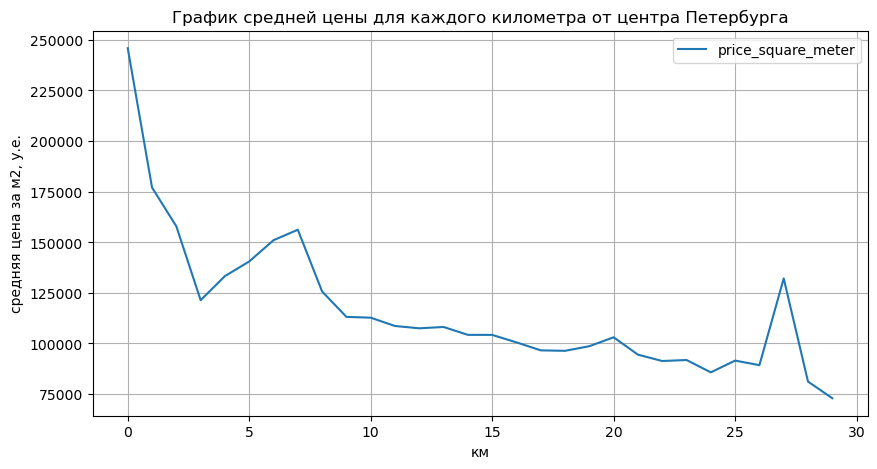

In [52]:
# построим график изменения средней цены для каждого километра от центра Петербурга
mean_price_square_meter_cityCenters_nearest_km.plot(grid=True, figsize=(10, 5))
plt.title("График средней цены для каждого километра от центра Петербурга")
plt.xlabel("км")
plt.ylabel("средняя цена за м2, у.е.")

**Промежуточные итоги:** \
После:\
. расчета средней цены для каждого киллометра от центра Петебурга;\
. построения графика зависимости между этими величинами\
можно утверждать, что стоимость объектов зависит от расстояния до центра горада (т.е. чем ближе к центру, тем дороже объект недвижимости).

## 5. Общий вывод

Мы провели работу с данными сервиса Яндекс Недвижимость - с аналитикой рынка недвижимости в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

На этапе предобработки этих данных мы обрабатывали пропуски, преобразовывали типы данных,  устраняли неявные дубликаты. Добавили новые «признаки» для каждого объекта недвижимости: цену одного квадратного метра; день недели публикации каждого объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры. 

На этапе исследовательского анализа данных мы строили графики, обрабатывали аномалии, определяли и интерпретировали взаимосвязи различных данных (как быстро продавались квартиры, какие факторы больше всего влияют на общую (полную) стоимость объекта, как стоимость объектов зависит от расстояния до центра города).

А результаты этого исследования таковы, что большего всего на этом рынке недвижимости представлено одно- и двухкомнатных квартир с общей площадью 60м², в среднем цена на такой объект колеблется в районе 5,5 млн. 

Эти квартиры, расположены выше первого этажа в пяти- или десятиэтажных домах. 

Меньше всего объявлений на квартиры, расположенных именно в центре города Петербурга, но при этом больше всего объявлений по локации именно в городе Петербурге. 

Как правило, продажи квартир происходят в течение 450 дней со дня публикации объявления. На цену за квадратный метр объекта недвижимости влияет удаленность от центра, этаж на котором эта квартира расположена.

Также обращаем Ваше внимание, что полученные данные имеют пропуски, аномальные значения, и это порой ошибки системы или процесса выгрузки.